1 gather data
2 EDA
3 clean text
4 Classifying reviwe
5 Building the Model

In [21]:
# import the libaries 
import pandas as pd
import numpy as np
import arabic_reshaper
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import plotnine
import sklearn

In [39]:
df= pd.read_csv("../capstone_project/data/app_data.csv")

In [58]:
aliexpress= pd.read_csv("../capstone_project/data/aliexpress.csv")
amazon= pd.read_csv("../capstone_project/data/amazon.csv")
asos= pd.read_csv("../capstone_project/data/asos.csv")
farfetch= pd.read_csv("../capstone_project/data/farfetch.csv")
shein= pd.read_csv("../capstone_project/data/shein.csv")
namshi= pd.read_csv("../capstone_project/data/Namshi.csv")



In [86]:
df.sample(5)

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate
9144,amazon,08/08/2020 0:00,6:01:35,AM,Expand services to rural parts to be a market ...,shreekanthps,3,Currently it’s doing fine in Cities but to be ...,False,NaN,4.2
17149,aliexpress,28/04/2018 0:00,6:20:08,AM,App review,cabecaleb,5,This app is one of the best things that happen...,False,cabecaleb,4.5
16617,aliexpress,24/11/2022 0:00,5:51:43,PM,Owner of Brent’s Bling llc,BrentsBling,5,I have had nothing but good experiences with m...,False,BrentsBling,4.5
7641,shein,02/05/2022 0:00,12:03:44,PM,It’s amazing !,EEEEHANSNSN,5,I’ve ordered so many times and all my products...,False,NaN,3.6
12678,amazon,09/02/2022 0:00,11:45:13,PM,Disappearing delivery details,bousozoku,2,Delivery information pops up at inconvenient t...,False,NaN,4.2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25305 entries, 0 to 25304
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AppName            25305 non-null  object 
 1   date               25305 non-null  object 
 2   time               25305 non-null  object 
 3   PmAm               25305 non-null  object 
 4   title              25305 non-null  object 
 5   userName           25305 non-null  object 
 6   rating             25305 non-null  int64  
 7   review             25305 non-null  object 
 8   isEdited           25305 non-null  bool   
 9   developerResponse  8432 non-null   object 
 10  OverallRate        25305 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 2.0+ MB


In [42]:
df.shape

(25305, 11)

In [43]:
df.columns

Index(['AppName', 'date', 'time', 'PmAm', 'title', 'userName', 'rating',
       'review', 'isEdited', 'developerResponse', 'OverallRate'],
      dtype='object')

In [22]:
df.isnull().sum()

AppName                  0
date                     0
time                     0
PmAm                     0
title                    0
userName                 0
rating                   0
review                   0
isEdited                 0
developerResponse    15633
OverallRate              0
dtype: int64

In [23]:
df.nunique()

AppName                  6
date                  2368
time                 18523
PmAm                     2
title                17995
userName             24005
rating                   5
review               23983
isEdited                 2
developerResponse     8432
OverallRate              4
dtype: int64

In [47]:
df.groupby(['AppName']).count()["OverallRate"]

AppName
Namshi        1169
aliexpress    7220
amazon        5000
asos          2740
farfetch       556
shein         8620
Name: OverallRate, dtype: int64

Text(0, 0.5, 'rating')

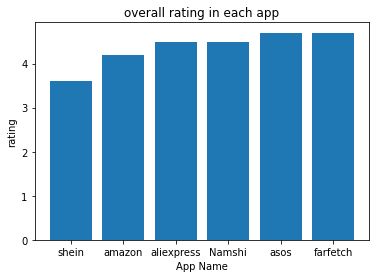

In [49]:
x= df['AppName']
y=df['OverallRate']
plt.bar(x,y)
plt.title('overall rating in each app')
plt.xlabel('App Name')
plt.ylabel('rating')

In [68]:
counting=amazon.groupby(['rating']).count()['appname']
counting

rating
1    1082
2     746
3     856
4     629
5    1687
Name: appname, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

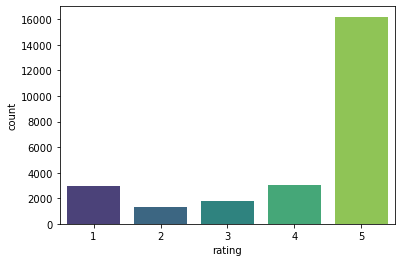

In [230]:
sns.countplot(x='rating',data=df,palette='viridis')

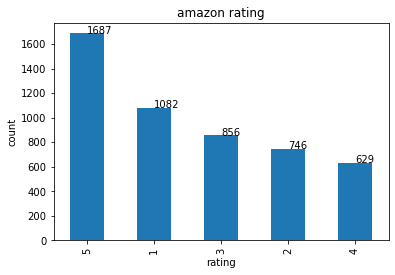

In [74]:
amazon.rating.value_counts().plot(kind='bar')
plt.title(('amazon rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(amazon.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

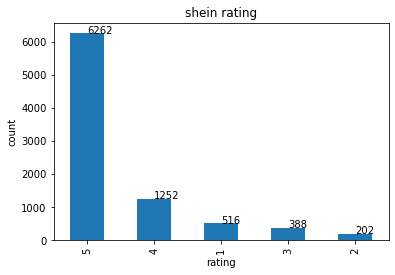

In [75]:
shein.rating.value_counts().plot(kind='bar')
plt.title(('shein rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(shein.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

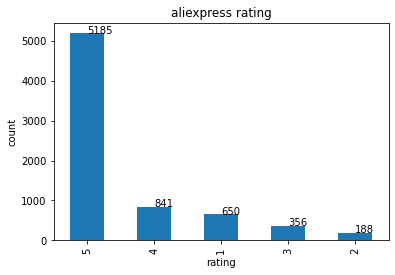

In [76]:
aliexpress.rating.value_counts().plot(kind='bar')
plt.title(('aliexpress rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(aliexpress.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

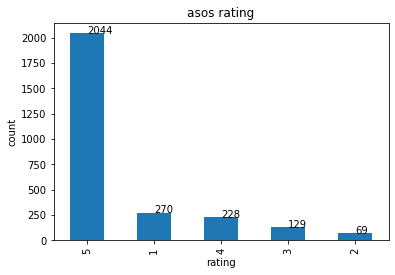

In [77]:
asos.rating.value_counts().plot(kind='bar')
plt.title(('asos rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(asos.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

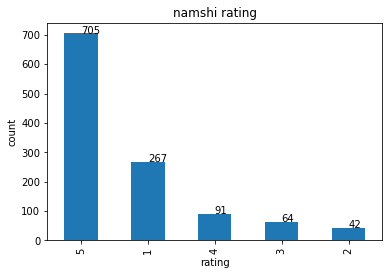

In [78]:
namshi.rating.value_counts().plot(kind='bar')
plt.title(('namshi rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(namshi.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

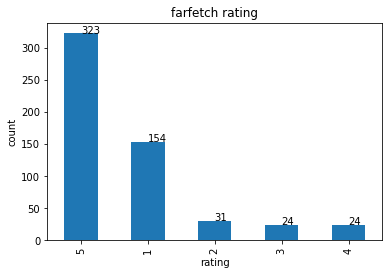

In [79]:
farfetch.rating.value_counts().plot(kind='bar')
plt.title(('farfetch rating'))
plt.xlabel("rating")
plt.ylabel('count')

for index, value in enumerate(farfetch.rating.value_counts()):
    plt.text(index, value, str(value))
plt.show()

1 EDA
2 clean words
3 Classifying reviwe
4 Building the Model

In [98]:
import nltk
from nltk.corpus import stopwords

In [90]:
## for data
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
## for language detection
import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

In [91]:
df.head(1)

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6


In [92]:
#ex to detect lang
review = df["review"].iloc[0]
print(review, " --> ", langdetect.detect(review))

Personally as someone who is a senior in high school and trying my hardest to save up for college while also getting a better more adult like wardrobe Shein has been my go to for clothes!! They have such a huge selection of ALL types of styles. Thus meaning I can buy clothes of all styles for cheap while trying to find my true self!! I love all of their clothes I have bought! I know some of my friends have had some issues with clothes they have bought but online shopping and with all the shipping this is normal!! Shein has helped all of them and sent them the right clothes or a new one!! People have also complained about some of the clothes quality but how can you complain about clothes quality knowing you are getting popular, cute, and trendy cheap clothes?? Obviously not everything is going to be made from great material!! We have to understand that!! If you have an issue with a $5 shirt that ripped easy or feels weird than go get a $50 shirt from a different store for “better qualit

## Text Preprocessing

In [96]:
print("--- original ---")
print(review)
print("--- cleaning ---")
review = re.sub(r'[^\w\s]', '', str(review).lower().strip()) #lowercase and remove punctuation  
print(review)
print("--- tokenization ---")
review = review.split()# split the test to words
print(review)

--- original ---
Personally as someone who is a senior in high school and trying my hardest to save up for college while also getting a better more adult like wardrobe Shein has been my go to for clothes!! They have such a huge selection of ALL types of styles. Thus meaning I can buy clothes of all styles for cheap while trying to find my true self!! I love all of their clothes I have bought! I know some of my friends have had some issues with clothes they have bought but online shopping and with all the shipping this is normal!! Shein has helped all of them and sent them the right clothes or a new one!! People have also complained about some of the clothes quality but how can you complain about clothes quality knowing you are getting popular, cute, and trendy cheap clothes?? Obviously not everything is going to be made from great material!! We have to understand that!! If you have an issue with a $5 shirt that ripped easy or feels weird than go get a $50 shirt from a different store f

In [100]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
print("--- remove stopwords ---")
review = [word for word in review if word not in lst_stopwords]
print(review)

--- remove stopwords ---
['personally', 'someone', 'senior', 'high', 'school', 'trying', 'hardest', 'save', 'college', 'also', 'getting', 'better', 'adult', 'like', 'wardrobe', 'shein', 'go', 'clothes', 'huge', 'selection', 'types', 'styles', 'thus', 'meaning', 'buy', 'clothes', 'styles', 'cheap', 'trying', 'find', 'true', 'self', 'love', 'clothes', 'bought', 'know', 'friends', 'issues', 'clothes', 'bought', 'online', 'shopping', 'shipping', 'normal', 'shein', 'helped', 'sent', 'right', 'clothes', 'new', 'one', 'people', 'also', 'complained', 'clothes', 'quality', 'complain', 'clothes', 'quality', 'knowing', 'getting', 'popular', 'cute', 'trendy', 'cheap', 'clothes', 'obviously', 'everything', 'going', 'made', 'great', 'material', 'understand', 'issue', '5', 'shirt', 'ripped', 'easy', 'feels', 'weird', 'go', 'get', '50', 'shirt', 'different', 'store', 'better', 'quality', 'even', 'tho', 'cases', 'quality', 'personally', 'never', 'issue', 'quality', 'clothes', 'also', 'probably', 'would

In [104]:
#we can apply word transformations. Stemming and Lemmatization both generate the root form of words.
##difference is that stem might not be an actual word whereas lemma is an actual language word
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in review])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in review])

--- stemming ---
['person', 'someon', 'senior', 'high', 'school', 'tri', 'hardest', 'save', 'colleg', 'also', 'get', 'better', 'adult', 'like', 'wardrob', 'shein', 'go', 'cloth', 'huge', 'select', 'type', 'style', 'thu', 'mean', 'buy', 'cloth', 'style', 'cheap', 'tri', 'find', 'true', 'self', 'love', 'cloth', 'bought', 'know', 'friend', 'issu', 'cloth', 'bought', 'onlin', 'shop', 'ship', 'normal', 'shein', 'help', 'sent', 'right', 'cloth', 'new', 'one', 'peopl', 'also', 'complain', 'cloth', 'qualiti', 'complain', 'cloth', 'qualiti', 'know', 'get', 'popular', 'cute', 'trendi', 'cheap', 'cloth', 'obvious', 'everyth', 'go', 'made', 'great', 'materi', 'understand', 'issu', '5', 'shirt', 'rip', 'easi', 'feel', 'weird', 'go', 'get', '50', 'shirt', 'differ', 'store', 'better', 'qualiti', 'even', 'tho', 'case', 'qualiti', 'person', 'never', 'issu', 'qualiti', 'cloth', 'also', 'probabl', 'would', 'care', 'would', 'notic', 'shop', 'lot', 'thrift', 'store', 'cheap', 'onlin', 'place', 'hey', 'that

In [153]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_review(review, flg_stemm=False, flg_lemm=True, lst_stopwords= None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    review = re.sub(r'[^\w\s]', '', str(review).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_review = review.split()
    
    ## remove Stopwords
    if lst_stopwords is not None :
        lst_review = [word for word in lst_review if word not in 
                    lst_stopwords]
        
        
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_review = [ps.stem(word) for word in lst_review]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_review = [lem.lemmatize(word) for word in lst_review]
            
    ## back to string from list
    review = " ".join(lst_review)
    return review

In [154]:
df["review_clean"] = df["review"].apply(lambda x: utils_preprocess_review(x, flg_stemm=False, flg_lemm=True, lst_stopwords= None))

In [169]:
df.head()

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...


In [167]:
print(df["review"].iloc[21], " --> ", df["review_clean"].iloc[21])


I love the clothing on SHEIN, however, the clothing all varies in both size and quality. Sometimes, you luck out and get something really nicely made, and sometimes, you get a super thin, see-through piece 2 sizes too big.  Unlike most other stores, I’ve noticed most of their items tend to run a little large instead of small, which in my opinion is not always a bad thing. Being plus size, it’s often difficult to find stylish, form-fitting, clothing that I personally like. Everything made in my size is always huge, has ugly slogans on it like “#BOSSBABE”, or has an ugly cut/shape. Everything on SHEIN is modern and fashionable. My only gripe with this site is it’s so difficult for me to find things in my correct size. I know I’m normally a 2X and I always do extensive research on each piece before purchasing, but for some reason, I still manage to get the wrong size often. I wish they would work on this and help make the sizing and quality more consistent. Either way, give it a shot! It’

In [166]:
# apply stopwords
stop = stopwords.words('english')
df['review_clean'] = df['review_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...
5,shein,19/05/2022 0:00,8:40:53,AM,SHEIN MAKES US SHINE❤️🌟,Summerlillysunshineglitter,5,I am a single 47 year old mother with teen dau...,False,NaN,3.6,single 47 year old mother teen daughter twenty...
6,shein,18/03/2021 0:00,2:02:55,AM,Best shopping app ever💜💜💜,ashadra,5,This app is absolutely the best. The prices ar...,False,NaN,3.6,app absolutely best price hella cheap affordab...
7,shein,13/11/2022 0:00,6:02:27,PM,Surprised,Sweet Ice 35,5,My daughter informed me about this site. When ...,False,NaN,3.6,daughter informed site wa looking wa impressed...
8,shein,22/11/2022 0:00,6:59:33,AM,Love.,Mxyaxx,5,SHEIN is one of the best shopping apps to get....,False,NaN,3.6,shein one best shopping apps get youre looking...
9,shein,14/07/2022 0:00,11:46:51,PM,absolutely love and recommend!!,angervscouser2000,5,I have been using shein for almost 2 years now...,False,NaN,3.6,using shein almost 2 year never complaint shei...


In [163]:
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
#def remove_emoji(text):
 #   emoji_pattern = re.compile("["
  #                         u"\U0001F600-\U0001F64F"  # emoticons
   #                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    #                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
     #                      u"\U0001F1E0-\U0001F1FF"  # flags 
      #                     u"\U00002702-\U000027B0"
       #                    u"\U000024C2-\U0001F251"
         #                  "]+", flags=re.UNICODE)
  #  return emoji_pattern.sub(r'', text)
# df['review_clean'] = df['review_clean'].apply(lambda x: remove_emoji(x))

In [225]:
from wordcloud import WordCloud

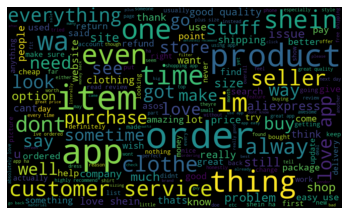

In [226]:
words=' '.join( [tweets for tweets in df["review_clean"]] )
wordcloud=WordCloud(width=1000, height=600, random_state=10, max_font_size=110).generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Length Analysis
####  word count: counts the number of tokens in the text (separated by a space)
#### character count: sum the number of characters of each token
#### sentence count: count the number of sentences (separated by a period)
#### average word length: sum of words length divided by the number of words (character count/word count)
#### average sentence length: sum of sentences length divided by the number of sentences (word count/sentence count)


In [170]:
df['word_count'] = df["review"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["review"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["review"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...,273,1174,2,4.300366,136.500000
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...,252,1166,19,4.626984,13.263158
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...,274,1128,16,4.116788,17.125000
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...,258,1085,7,4.205426,36.857143
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...,245,1072,21,4.375510,11.666667


In [193]:
review = df["review"].iloc[0]
print(review, " --> ", langdetect.detect(review)) #eng قابل للحذف 

Personally as someone who is a senior in high school and trying my hardest to save up for college while also getting a better more adult like wardrobe Shein has been my go to for clothes!! They have such a huge selection of ALL types of styles. Thus meaning I can buy clothes of all styles for cheap while trying to find my true self!! I love all of their clothes I have bought! I know some of my friends have had some issues with clothes they have bought but online shopping and with all the shipping this is normal!! Shein has helped all of them and sent them the right clothes or a new one!! People have also complained about some of the clothes quality but how can you complain about clothes quality knowing you are getting popular, cute, and trendy cheap clothes?? Obviously not everything is going to be made from great material!! We have to understand that!! If you have an issue with a $5 shirt that ripped easy or feels weird than go get a $50 shirt from a different store for “better qualit

In [ ]:
x, y = "char_count", "y"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

In [198]:
df.head()

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...,273,1174,2,4.300366,136.500000,0.244706
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...,252,1166,19,4.626984,13.263158,0.100600
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...,274,1128,16,4.116788,17.125000,0.151529
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...,258,1085,7,4.205426,36.857143,0.135962
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...,245,1072,21,4.375510,11.666667,0.043651


In [200]:
i = 0
print(df["review_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", df[col].iloc[i])# قابل للحذف

personally someone senior high school trying hardest save college also getting better adult like wardrobe shein ha go clothes huge selection type style thus meaning buy clothes style cheap trying find true self love clothes bought know friend issue clothes bought online shopping shipping normal shein ha helped sent right clothes new one people also complained clothes quality complain clothes quality knowing getting popular cute trendy cheap clothes obviously everything going made great material understand issue 5 shirt ripped easy feel weird go get 50 shirt different store better quality even tho case quality personally never issue quality clothes also probably would care would notice shop lot thrift store cheap online place hey thats anyways love shein price shein reason get new clothes thank shein thank great price insane selection  --> 
word_count: 273
char_count: 1174
sentence_count: 2
avg_word_length: 4.3003663003663
avg_sentence_lenght: 136.5


In [176]:
df.head()

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...,273,1174,2,4.300366,136.500000
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...,252,1166,19,4.626984,13.263158
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...,274,1128,16,4.116788,17.125000
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...,258,1085,7,4.205426,36.857143
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...,245,1072,21,4.375510,11.666667


In [ ]:
# Get Polarity Scores
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_clean']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
pd.DataFrame(res).T #Turn vader results into a DataFrame

## or

In [231]:
'''
# Sentiment analysis
# TextBlob Exit will return polarity and subjectivity.
# Polarity indicates your mood, that is, whether it is positive.
# It returns a value between 0 and 1. The closer to 1 the more positive, the closer to 0 the more negative.
'''

df[['polarity', 'subjectivity']] = df['review_clean'].apply(lambda x: pd.Series(TextBlob(x).sentiment))

for index, row in df['review_clean'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"

In [196]:
#sentiment analysis (textblob)
#polarity (-1,1)
df["sentiment"] = df["review_clean"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)


In [223]:
for index, row in df['review_clean'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"

KeyboardInterrupt: 

In [197]:
df

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...,273,1174,2,4.300366,136.500000,0.244706
1,shein,05/01/2021 0:00,9:35:44,PM,LEGIT,vinarris,5,100% legit site for fashionable affordable clo...,False,NaN,3.6,100 legit site fashionable affordable clothing...,252,1166,19,4.626984,13.263158,0.100600
2,shein,14/08/2022 0:00,2:02:20,AM,SHEIN LITERALLY SAVED ME,I ❤️PicCollage!!,5,I am a freshman in college and my parents got ...,False,NaN,3.6,freshman college parent got divorced wa little...,274,1128,16,4.116788,17.125000,0.151529
3,shein,31/10/2022 0:00,4:26:23,PM,Absolutely Love SHEIN!!! I Highly recommend!,Juicy_Jen_916,5,My 1st order I was a little skeptical that the...,False,NaN,3.6,1st order wa little skeptical quality would go...,258,1085,7,4.205426,36.857143,0.135962
4,shein,02/09/2022 0:00,10:59:43,PM,After a year finally writing a review,Linda76i,5,I was very skeptical about ordering from this ...,False,NaN,3.6,wa skeptical ordering site read many complaint...,245,1072,21,4.375510,11.666667,0.043651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,farfetch,02/02/2019 0:00,2:03:25,AM,Unreliable,Fionacoco,1,When you purchase the item and they send you e...,False,NaN,4.7,purchase item send email order cancelledthe re...,27,121,5,4.481481,5.400000,0.000000
25301,farfetch,15/11/2018 0:00,3:54:58,AM,"A platform for scam, horrible customer support",jiabulabududu4,1,Horrible customer experience: 1) I tried to re...,False,NaN,4.7,horrible customer experience 1 tried return pa...,239,1045,17,4.372385,14.058824,-0.134242
25302,farfetch,20/10/2017 0:00,7:51:16,AM,Perfection!,Hansel Ruth,5,Super love this app! Their buyers are the best...,False,NaN,4.7,super love app buyer best nice access beautifu...,46,224,3,4.869565,15.333333,0.491303
25303,farfetch,27/04/2016 0:00,5:39:51,PM,App Farfetch Discover!,Coisas Doces da Vida,5,Acabei de baixar o app e estou adorando!\nEle ...,False,NaN,4.7,acabei de baixar app e estou adorando ele é mu...,33,174,1,5.272727,33.000000,0.333333


In [191]:
print(df["review"].iloc[0], " --> ", df["sentiment"].iloc[0])


Personally as someone who is a senior in high school and trying my hardest to save up for college while also getting a better more adult like wardrobe Shein has been my go to for clothes!! They have such a huge selection of ALL types of styles. Thus meaning I can buy clothes of all styles for cheap while trying to find my true self!! I love all of their clothes I have bought! I know some of my friends have had some issues with clothes they have bought but online shopping and with all the shipping this is normal!! Shein has helped all of them and sent them the right clothes or a new one!! People have also complained about some of the clothes quality but how can you complain about clothes quality knowing you are getting popular, cute, and trendy cheap clothes?? Obviously not everything is going to be made from great material!! We have to understand that!! If you have an issue with a $5 shirt that ripped easy or feels weird than go get a $50 shirt from a different store for “better qualit

In [222]:
df.sentiment.value_counts()

0.000000    1566
0.500000     465
0.250000     270
0.300000     211
0.400000     191
            ... 
0.113542       1
0.471591       1
0.285000       1
0.428889       1
0.491303       1
Name: sentiment, Length: 8865, dtype: int64

In [182]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)# قابل للحذف

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [185]:
# NER (Named-entity recognition) is the process to tag named entities 
## call model
import spacy
nlp = spacy.load("en_core_web_sm")

In [219]:
## tag text
review = df["review"].iloc[4]
doc = nlp(review)

In [220]:
## display result
spacy.displacy.render(doc, style="ent")

In [221]:
## tag text and exctract tags into a list
df["tags"] = df["review"].apply(lambda x: [(tag.review, tag.label_) 
                                for tag in nlp(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
df.head()

AttributeError: 'spacy.tokens.span.Span' object has no attribute 'review'

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show() # قابل للحذف

TypeError: 'LazyCorpusLoader' object is not iterable

In [216]:
#sentimnit using vder (better with social media analsys or emostional analsyis)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [217]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [227]:
df.head(1)

,AppName,date,time,PmAm,title,userName,rating,review,isEdited,developerResponse,OverallRate,review_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
0,shein,09/03/2022 0:00,2:42:42,PM,I <3 shein!!,_keyy22,5,Personally as someone who is a senior in high ...,False,NaN,3.6,personally someone senior high school trying h...,273,1174,2,4.300366,136.5,Positive


Text(0.5, 0.98, 'Most frequent words')

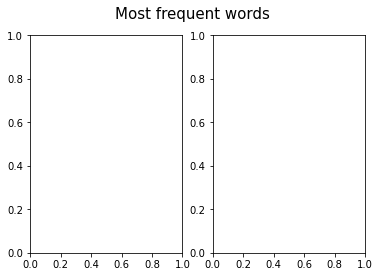

In [229]:
AppName = "shein"
corpus = df[df["AppName"]==AppName]["review_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)

NameError: name 'top' is not defined

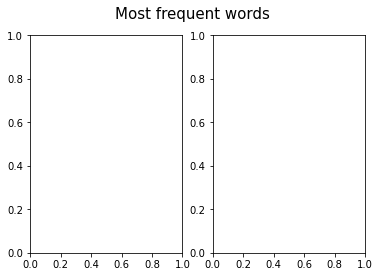

In [228]:
AppName = "shein"
corpus = df[df["AppName"]==AppName]["review_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

plt.show()